### Assignment 7

We will work on ideas from model selection (eg cross validation) and error metrics (eg f1 score).

For real data we will use the `accelerometer` data, which is loaded below.

This is a trinary classification problem in its raw form.

So that everyone can work with the same train/test split I have done that part with a fixed `random_state`. 

The questions start after the data is set up.

In [1]:
import matplotlib as plt

In [2]:
import pandas as pd
from sklearn.metrics import precision_score,f1_score,recall_score
df = pd.read_csv("accelerometer.csv")
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [3]:
df["wconfid"].value_counts()  ## the target

1    51000
2    51000
3    51000
Name: wconfid, dtype: int64

In [4]:
y = (df["wconfid"]==1)*2-1 ## Turn 3 class problem into 2 class problem
X = df[[c for c in df.columns if c != "wconfid"]]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7735424836601307

In [6]:
yhat = clf.predict_proba(X_test) ### Probability vector

In [7]:
toy_yhat = yhat[:7]
toy_y_test = y_test[:7]
thetas = [0.3,0.5,0.7,0.9]  ## Thresholds
print(toy_yhat)
print(toy_y_test)

[[0.9975    0.0025   ]
 [0.84      0.16     ]
 [0.4       0.6      ]
 [0.5033373 0.4966627]
 [0.8       0.2      ]
 [0.86      0.14     ]
 [0.58      0.42     ]]
5832      1
126495   -1
45864     1
57123    -1
88065    -1
95550    -1
77280    -1
Name: wconfid, dtype: int32


## Problem 1

You can do this by hand or with code. 

I suggest doing it by hand at least once. 

In the above code we get a short vector of probability predictions `toy_yhat`. 

We also get a short vector of corresponding true classes, `toy_y_test`.

The `thetas` variable contains a list of possible thresholds $\theta$ for turning `toy_yhat` into a vector of $\pm 1$ predictions. 

To be precise, `(toy_yhat > t)*2-1` is a $\pm 1$ prediction vector for each `t`$\in$`thetas`. 

---

For each value of $\theta$ in `thetas`, give the following properties of the resulting vector of $\pm 1$ predictions when the threshold is applied to `toy_yhat`. 

1. The precision
2. The recall
3. The f1 score

Which threshold maximizes the `f1 score`? 

## Seems like the theta with the highest f1 score is .5

In [8]:
test = (toy_yhat > 0.7)*2-1
print(test)
print(toy_y_test)

[[ 1 -1]
 [ 1 -1]
 [-1 -1]
 [-1 -1]
 [ 1 -1]
 [ 1 -1]
 [-1 -1]]
5832      1
126495   -1
45864     1
57123    -1
88065    -1
95550    -1
77280    -1
Name: wconfid, dtype: int32


In [9]:
for t in  thetas:
    print("theta: ",t)
    y_pred = (toy_yhat > t)*2-1
    print(precision_score(toy_y_test,y_pred[:,1]))
    print(recall_score(toy_y_test,y_pred[:,1]))
    print(f1_score(toy_y_test,y_pred[:,1]))
    print()

theta:  0.3
0.3333333333333333
0.5
0.4

theta:  0.5
1.0
0.5
0.6666666666666666

theta:  0.7
0.0
0.0
0.0

theta:  0.9
0.0
0.0
0.0



c:\users\stephen williams\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\stephen williams\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Problem 2

Consider the learning curves shown below. 

(This code takes some time to run (2 mins?)... You don't need to rerun it as long as you can see the images.)

The code is adapted from the textbook code for Ch 6. 

---

Can you explain what is happening here in terms of your knowledge of learning curves? 

Does this fit the "cartoon" version of the way ideal learning curves are supposed to work? 

Which value for `max_depth` of the random forest would you put in the model you gave to a client? 

What would you say?

What do you think the effect of more data would be in the case of each value for `md`? 

### It seems that we start with graphs that are underfitting to then graphs that are overfitting at the end
### These curves do not seem "ideal" as the lines are not smooth and are jagged.
### Max depth = 8 is the parameter I would choose. We have a high accuracy on both the training and test set, and they both converge as more data are introduced. It is not overfitting or underfitting.
### I imagine that those that havent converged yet would then do so with more data eventually.

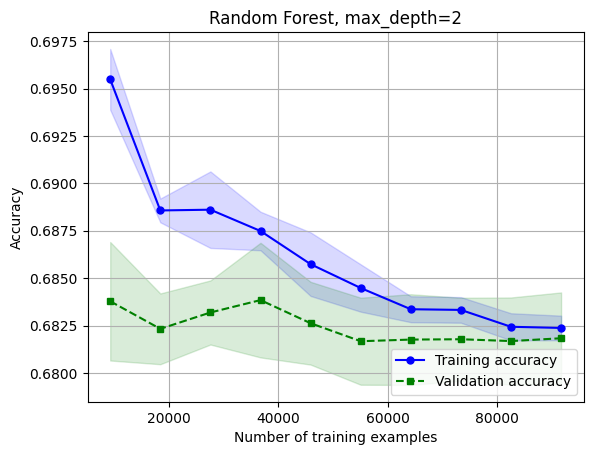

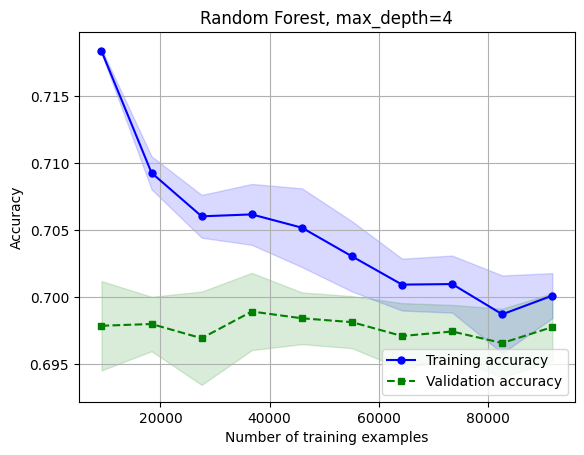

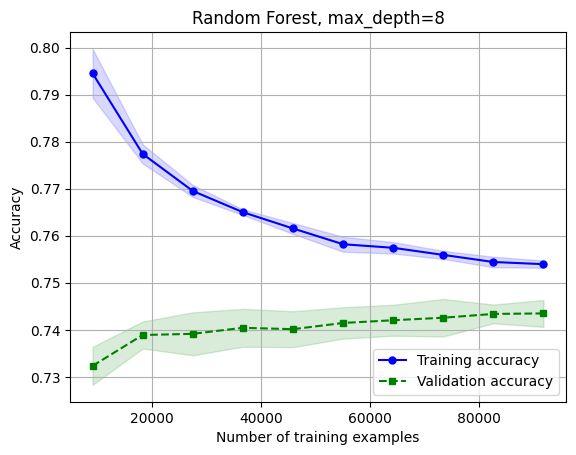

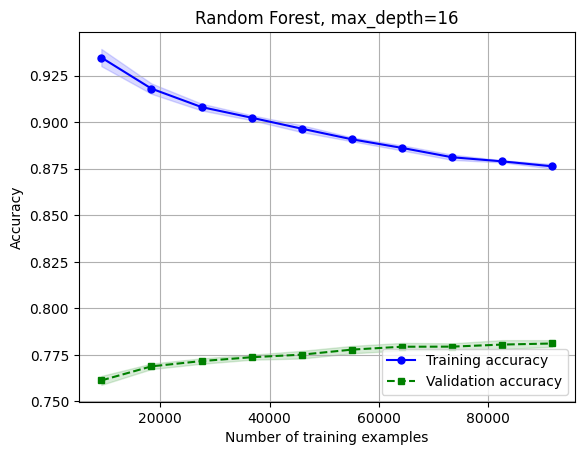

KeyboardInterrupt: 

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import numpy as np

#clf = LogisticRegression(penalty='l2', random_state=1,solver='lbfgs', max_iter=10000)

for md in [2,4,8,16,None]:
    clf = RandomForestClassifier(max_depth=md,n_jobs=-1) 


    pipe_rf = make_pipeline(StandardScaler(),clf)

    train_sizes, train_scores, test_scores =\
                    learning_curve(estimator=pipe_rf,
                                X=X_train,
                                y=y_train,
                                train_sizes=np.linspace(0.1, 1.0, 10),
                                cv=5,
                                n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,
            color='blue', marker='o',
            markersize=5, label='Training accuracy')

    plt.fill_between(train_sizes,
                    train_mean + train_std,
                    train_mean - train_std,
                    alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
            color='green', linestyle='--',
            marker='s', markersize=5,
            label='Validation accuracy')

    plt.fill_between(train_sizes,
                    test_mean + test_std,
                    test_mean - test_std,
                    alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.title(f"Random Forest, max_depth={md}")
    plt.legend(loc='lower right')
    plt.show()

### Problem 3

Below is some minimal functional code for plotting a ROC curve.

The data used is from a `RandomForest` model with default parameters.

Improve this graph by adding ROC curves for `RandomForest` with other hyperparameter settings.

For example you might try out all of the values for `max_depth` considered in Problem 2. 

Plot all the curves in the same figure. 

Use the library `roc_auc_score` (from `sklearn.metrics`) to find the hyperparameter settings that give the random forest the best ROC-AUC performance. 

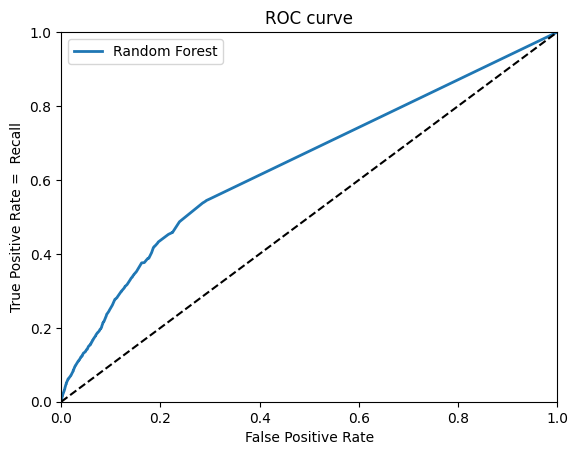

In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr,thresholds = roc_curve(y_test,yhat[:,1])

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate =  Recall")
    plt.title("ROC curve")
    plt.legend()
    
plot_roc_curve(fpr,tpr,"Random Forest")
plt.show()



c:\users\stephen williams\downloads\nlp-extra-credit-main\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


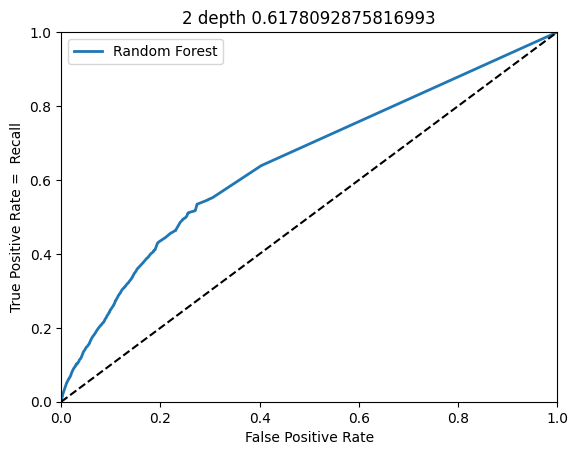

c:\users\stephen williams\downloads\nlp-extra-credit-main\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


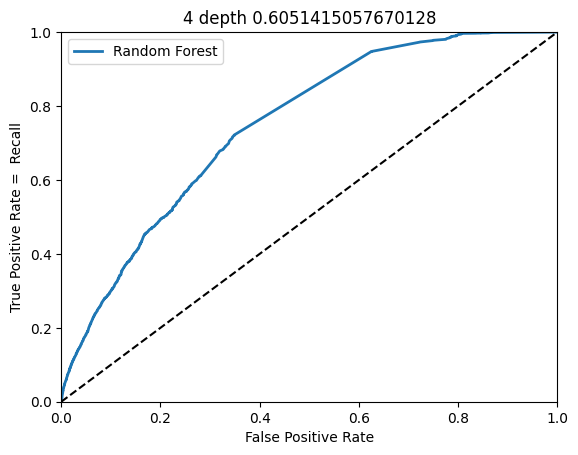

c:\users\stephen williams\downloads\nlp-extra-credit-main\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


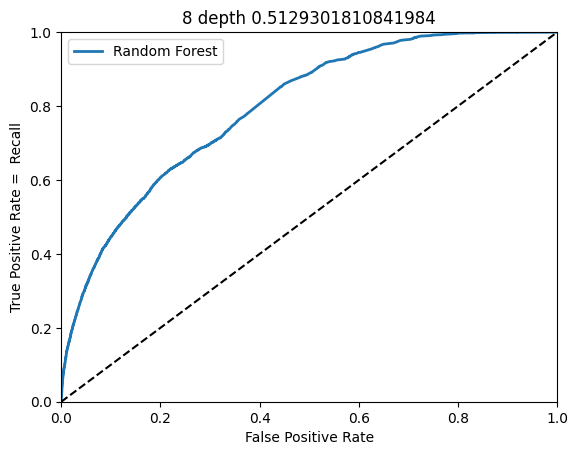

c:\users\stephen williams\downloads\nlp-extra-credit-main\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


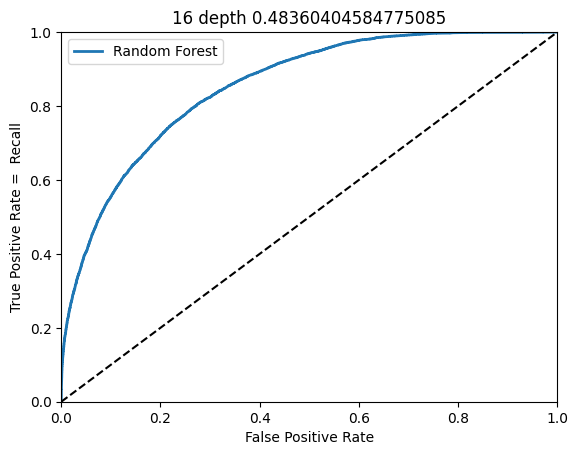

c:\users\stephen williams\downloads\nlp-extra-credit-main\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


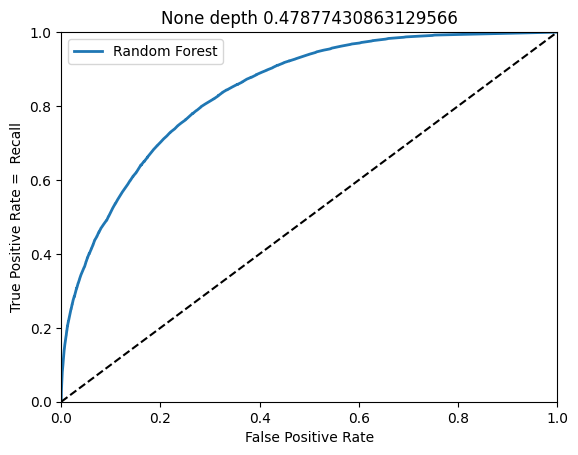

In [22]:
from sklearn.metrics import roc_auc_score
for md in [2,4,8,16,None]:
    clf = RandomForestClassifier(max_depth=md,n_jobs=-1) 
    clf.fit(X_train,y_train)
    yhat = clf.predict_proba(X_test)
    fpr, tpr,thresholds = roc_curve(y_test,yhat[:,1])
    plot_roc_curve(fpr,tpr,"Random Forest")
    plt.title(str(md) +" depth "+ str(roc_auc_score(y, clf.predict_proba(X)[:, 1])))
    plt.show()
    

### Problem 4

Below there is some code set up to do grid search for the best random forest hyperparameters on the accelerator data.

Here the "best" will be with respect to the ROC-AUC score. 

However, you need to define the parameter grid.

Set up the grid to try various values for `max_features`, and `max_depth`. 

You might need to read the documentation to see what the options are for `max_features`. 

To see a working parameter grid you can look in the Ch 6 code (included in this directory as a pdf). 

#### Bonus

Change the scorer to be `accuracy`.  How does that affect the "best" model? 

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=True)




param_grid = {
              'max_features': [2,4],
              'max_depth': [2,4,6,8],
              }

clf = RandomForestClassifier(n_jobs=-1) 



gs = GridSearchCV(estimator=clf,
                  param_grid=param_grid,
                  scoring=roc_auc_scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)



0.7943534170370816
{'max_depth': 8, 'max_features': 2}
